In [46]:
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import spacy
import matplotlib.pyplot as plt

nlp = spacy.load('fr_core_news_sm')

In [47]:
# before = 0
# after = 1
model = 'flaubert_base_uncased'
dataset = 'frwac_rg'

In [48]:
def lemmatize_spacy(word):
    # one word
    doc = nlp(word)
    return doc[0].lemma_

def read_log_line(line):
    temp = {}
    l = line.strip().split("\t")
    temp['probs'] = [float(x) for x in l[1][7:-1].split(', ')]
    temp['tokenized_sent'] = l[2]
    temp['sent'] = l[3]
    temp['adj'] = l[-5]
    temp['noun'] = l[-4]
#     temp['adj_lemma'] = lemmatize_spacy(l[-5])
    if l[0].startswith('right'):
        temp['position'] = int(l[0].split(': ')[1])
    else:
        temp['position'] = abs(int(l[0].split(': ')[1]) -1)
        
    return temp

In [49]:
wrong = []
right = []

with open('logs/' + dataset + '/' + model + '.log', 'r') as f:
    for line in f:
        if 'right_label' in line:
            right.append(read_log_line(line))
        elif 'wrong_label' in line:
            wrong.append(read_log_line(line))
            
all_sents = wrong + right

In [45]:
print('Unique adjectives:', len(set([sent['adj'] for sent in all_sents])))
print('Unique nouns:', len(set([sent['noun'] for sent in all_sents])))
print()
print('Wrong guesses:', len(wrong), '/', len(all_sents), '(', (len(wrong)/len(all_sents)), ')')
print('Right guesses:', len(right), '/', len(all_sents), '(', (len(right)/len(all_sents)), ')')

Wrong guesses: 477 / 13258 ( 0.035978277266556044 )
Right guesses: 12781 / 13258 ( 0.964021722733444 )


['réel',
 'nouveau',
 'nouvelle',
 'austère',
 'apres',
 'qualificatif',
 'vive',
 'alternatives',
 'réel',
 'membres',
 'futurs',
 '12/09/2007',
 'infinies',
 'autres',
 'dernier',
 'deux',
 '\x96',
 'nouveau',
 'constante',
 'gris',
 'première',
 'diverses',
 'brillant',
 'voisine',
 'juste',
 'grands',
 '06',
 'dernier',
 'nouvelles',
 '$',
 '\x96',
 'sous-thématique',
 'iditufen',
 'important',
 'plein',
 '\x96',
 'basses',
 'nouvelle',
 'i',
 'bas',
 'énigmatique',
 'éventuelle',
 'prisonniers',
 'plaine',
 'haute',
 '22',
 '0478033000',
 '\x96',
 'troisième',
 'terribles',
 'matériel',
 'illustres',
 '\x93',
 'nouveaux',
 'fidèles',
 'magnifique',
 'nouveaux',
 'précédentes',
 'grosse',
 'principaux',
 'tout',
 'simple',
 '10',
 'seule',
 'même',
 'blonde',
 'seule',
 'rituels',
 'seule',
 'unique',
 'super',
 'nouvelle',
 'éventuelles',
 '2',
 'second',
 '1',
 'gravure',
 'utile',
 "j'organise",
 'fort',
 'nvelle',
 'seconde',
 'franchisés',
 'gras',
 'v',
 'aveugle',
 'vivants'

In [23]:
with open(model +'_mistakes.tsv', 'w') as f:
    for x in wrong:
        f.write('\t'.join([x['tokenized_sent'], x['adj'], x['noun'], x['adj'],
                           str(x['position']), str(x['probs'])                           
                          ]))
        f.write('\n')

In [7]:
# 'Adjective was before noun, but was predicted as after:'
print('Counts of wrong-before adjectives:')
print(Counter([x['adj_lemma'] for x in wrong if x['position'] == 0]))
print()
# 'Adjective was after noun, but was predicted as before:')
print('Counts of wrong-after adjectives:')
print(Counter([x['adj_lemma'] for x in wrong if x['position'] == 1]))

Counts of wrong-before adjectives:
Counter({'nouveau': 7, 'important': 3, 'premier': 2, 'grand': 2, 'même': 2, 'simple': 2, 'dollar': 2, 'équitable': 2, 'pleine': 1, '10': 1, 'qualificatif': 1, 'membre': 1, 'infinie': 1, 'briller': 1, 'énigmatique': 1, 'matériel': 1, 'précédente': 1, 'tout': 1, 'second': 1, 'gravure': 1, 'aveugle': 1, 'in': 1, 'physique': 1, 'récent': 1, 'pepette16': 1, 'bâti': 1, 'iii': 1, 'jeune': 1, 'politique': 1, 'financier': 1, 'profonde': 1, 'particulier': 1, 'juste': 1, 'saint': 1, 'future': 1, 'administratif': 1, '2': 1, 'isoler': 1, 'possible': 1, 'abondant': 1, 'noir': 1, 'hypothétique': 1, 'autre': 1, 'dynamique': 1, 'progressif': 1, 'title=': 1, 'large': 1, 'divine': 1, 'suspect': 1, 'inusable': 1, 'heureux': 1, 'parfaire': 1, 'prochain': 1, 'constant': 1, 'gris': 1, '3': 1, 'immense': 1, 'réel': 1, 'bouillante': 1, '11': 1, 'haute': 1, '4': 1, 'hydratant': 1, 'délicat': 1, 'précedente': 1, 'magnifique': 1, 'référentiel': 1, 'mystérieux': 1, 'réaliste': 1,

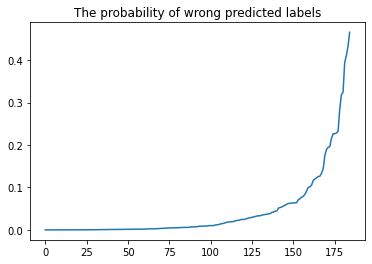

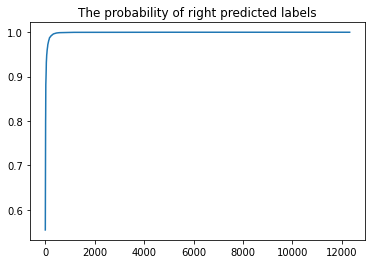

In [8]:
# see probabilities

wrong_probabilities = sorted([sent['probs'][sent['position']] for sent in wrong])
plt.title('The probability of wrong predicted labels')
plt.plot([x for x in range(len(wrong_probabilities))], wrong_probabilities)
plt.show()
plt.clf()

right_probabilities = sorted([sent['probs'][sent['position']] for sent in right])
plt.title('The probability of right predicted labels')
plt.plot([x for x in range(len(right_probabilities))], right_probabilities)

In [9]:
# most frequent adjectives

sorted_lemmas = sorted(Counter([x['adj_lemma'] for x in all_sents]).items(), key=lambda x: x[1], reverse=True)
most_freq = [x[0] for x in sorted_lemmas[:10]]
print(most_freq)

['tout', 'nouveau', 'premier', 'grand', 'public', 'français', 'européen', 'social', 'national', 'dernier']


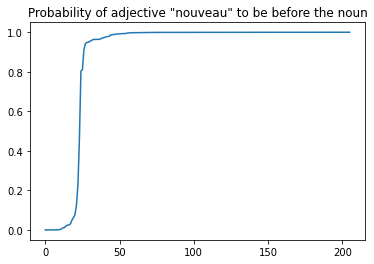


Predicted as after-noun, was before-noun : 
7 / 2655

Predicted as before-noun, was after-noun : 
6 / 9844


In [10]:
# plot the probs of most frequent adjectives
adj = 'nouveau'
to_plot = []
for sent in all_sents:
    if sent['adj_lemma'] == adj:
        to_plot.append(sent["probs"][0])
        
plt.title('Probability of adjective "' + adj + '" to be before the noun')
plt.plot(list(range(len(to_plot))), sorted(to_plot))
plt.show()

print('\nPredicted as after-noun, was before-noun : ')
print(len([1 for x in wrong if x['adj_lemma'] == adj and x['position'] == 0]), "/", \
      len([1 for x in all_sents if x['position'] == 0]))
print('\nPredicted as before-noun, was after-noun : ')
print(len([1 for x in wrong if x['adj_lemma'] == adj and x['position'] == 1]), "/", \
      len([1 for x in all_sents if x['position'] == 1]))

In [11]:
# mostly before noun: tout, premier, grand, nouveau
# mostly after noun: public, français, européen, social, national
# both: dernier

nouvelle 64


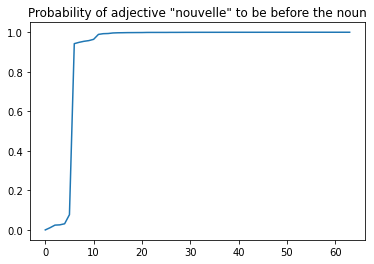


nouveau 53


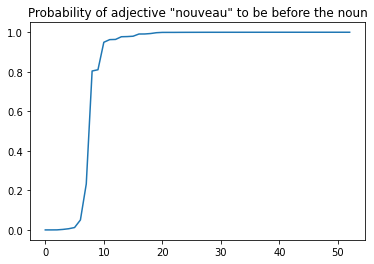


nouvelles 36


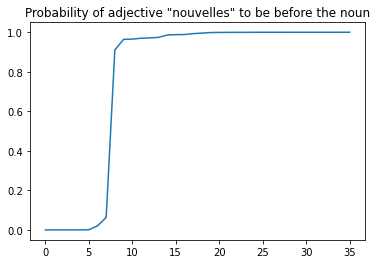


nouveaux 44


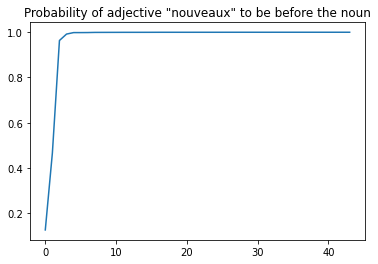


nouvel 9


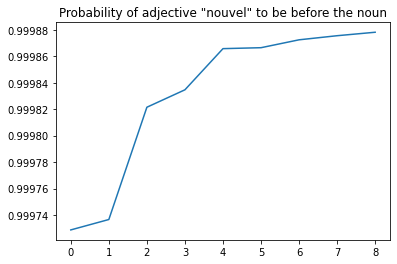

<Figure size 432x288 with 0 Axes>

In [12]:
# focus on nouveau
adj = 'nouveau'
nouveau_sents = {'nouvelle':[], 'nouveau':[], 'nouvelles':[], 
                 'nouveaux':[], 'nouvel':[]}
for sent in all_sents:
    if sent['adj_lemma'] == adj:
        nouveau_sents[sent['adj']].append(sent)

for adj in nouveau_sents:
    print(adj, len(nouveau_sents[adj]))
    to_plot = sorted([sent['probs'][0] for sent in nouveau_sents[adj]])
    plt.title('Probability of adjective "' + adj + '" to be before the noun')
    plt.plot(list(range(len(to_plot))), to_plot)
    plt.show()
    plt.clf()
    print()